## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.style.use('fivethirtyeight')


In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
feature_names = boston['feature_names']

In [6]:
X = pd.DataFrame(boston['data'], columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = pd.DataFrame(boston["target"], columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'До:\t{X_train_scaled.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(404, 13)
После:	(404, 2)


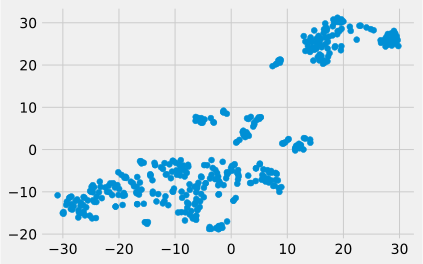

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [20]:
train_labels = model.fit_predict(X_train_scaled)

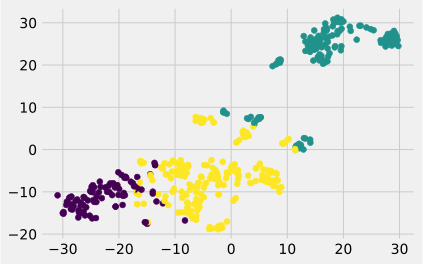

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [22]:
train_labels

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [23]:
# сформируем итоговую таблицу (сделаем копию чтобы не портить исходные данные) и подсчитаем среднее 
result = X_train.copy()
result['cluster'] = train_labels
result['price'] = y_train

In [24]:
result.shape

(404, 15)

In [25]:
result.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,cluster,price
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,2,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,0,19.4
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,1,13.4
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,2,18.2
325,0.19186,0.0,7.38,0.0,0.4930,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08,2,24.6
335,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,2,21.1
56,0.02055,85.0,0.74,0.0,0.4100,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,0,24.7
437,15.17720,0.0,18.10,0.0,0.7400,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45,1,8.7
409,14.43830,0.0,18.10,0.0,0.5970,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,1,27.5


In [26]:
groupby = result.groupby("cluster")
groupby['CRIM', 'price'].mean()

,CRIM,price
cluster,,
0,0.073566,27.788372
1,10.797028,16.165354
2,0.421660,24.958115


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [27]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

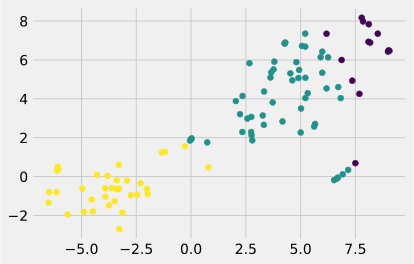

In [28]:
test_labels = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.show()

In [29]:
# сформируем итоговую таблицу (сделаем копию чтобы не портить исходные данные) и подсчитаем среднее 
result = X_test.copy()
result['cluster'] = test_labels
result['price'] = y_test

In [30]:
groupby = result.groupby("cluster")
groupby['CRIM', 'price'].mean()

,CRIM,price
cluster,,
0,0.086186,33.871429
1,0.252007,21.552830
2,10.165531,16.437143
